<div style="
  padding: 18px 24px;
  margin-top: 15px;
  margin-bottom: 25px;
  border-left: 6px solid var(--jp-info-color0);
  background: var(--jp-layout-color2);
  border-radius: 8px;
">
<h1 style="margin:0; color:var(--jp-ui-font-color1);">
02. Data Description
</h1>
<p style="font-size: 1.1em; color: var(--jp-ui-font-color1); margin-top: 6px;">
Детальное описание содержимого датасета
</p>
</div>

<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  /* color: var(--jp-ui-font-color1); */
  margin-top: 32px;
">
02.1 Наименования полей
</h2><br/>


| Column | Description (EN) | Описание (RU) | Короткое имя (RU) |
| --- | --- | --- | --- |
| **Признаки пищевых привычек** |  |  |  |
| `FAVC` | Frequent consumption of high caloric food | Частое употребление высококалорийной пищи | Колорийная еда |
| `FCVC` | Frequency of consumption of vegetables | Частота употребления овощей | Овощи |
| `NCP` | Number of main meals | Количество основных приемов пищи | Приёмы пищи |
| `CAEC` | Consumption of food between meals | Перекусы между приемами пищи | Перекусы |
| `CH2O` | Consumption of water daily | Потребление воды в день | Вода |
| `CALC` | Consumption of alcohol | Употребление алкоголя | Алкоголь |
| **Признаки физического состояния** |  |  |  |
| `SCC` | Calories consumption monitoring | Самоконтроль потребления калорий | Монит. калорий |
| `FAF` | Physical activity frequency | Частота физической активности | Физ. активность |
| `TUE` | Time using technology devices | Время использования электронных устройств | Гаджеты |
| `MTRANS` | Transportation used | Используемый транспорт | Транспорт |
| **Дополнительные переменные** |  |  |  |
| `Gender` | Gender | Пол | Пол |
| `Age` | Age | Возраст | Возраст |
| `Height` | Height | Рост | Рост |
| `Weight` | Weight | Вес | Вес |
| `family_history_with_overweight` | Family history with overweight | История ожирения в семье | Ожирение в семье |
| `SMOKE` | Smoke | Курение | Курение |
| **Целевая переменная** |  |  |  |
| `NObeyesdad` | Obesity level | Уровень ожирения | Уровень ожир. |



**Диапазоны целевой переменной (`NObeyesdad`):**

| Column | Описание (RU) | Диапазон |
| --- | --- | --- |
| `Underweight` | Недостаточный вес | < 18.5 |
| `Normal` | Норма | 18.5–24.9 |
| `Overweight` | Избыточный вес | 25.0–29.9 |
| `Obesity I` | Ожирение I | 30.0–34.9 |
| `Obesity II` | Ожирение II | 35.0–39.9 |
| `Obesity II` | Ожирение III | > 40 |



<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
02.2 Типы данных
</h2>


In [7]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
from utils import load_columns_mapping, load_raw_df
import math
import phik
import matplotlib.pyplot as plt

df = load_raw_df()

columns_mapping = load_columns_mapping()

In [8]:
# Информация о типах данных
display(Markdown("**Информация о типах данных:**"))
info_df = pd.DataFrame({
    "Тип данных": df.dtypes.astype(str),
    "Уникальных значений": df.nunique(),
    "Примеры значений": [", ".join(map(str, df[col].unique()[:5])) for col in df.columns],
})

info_df = info_df.reset_index().rename(columns={"index": "Наименование поля"})
description_ru = info_df["Наименование поля"].map(
    lambda col: columns_mapping.get(col, {}).get("description_ru", "")
)
info_df.insert(1, "description_ru", description_ru)
display(info_df)

# Проверка числовых признаков
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

display(Markdown(f"**Числовые признаки ({len(numeric_cols)}):** {', '.join(numeric_cols)}"))
display(Markdown(f"**Категориальные признаки ({len(categorical_cols)}):** {', '.join(categorical_cols)}"))


**Информация о типах данных:**

,Наименование поля,description_ru,Тип данных,Уникальных значений,Примеры значений
0,Gender,Пол,object,2,"Female, Male"
1,Age,Возраст,float64,1402,"21.0, 23.0, 27.0, 22.0, 29.0"
2,Height,Рост,float64,1574,"1.62, 1.52, 1.8, 1.78, 1.5"
3,Weight,Вес,float64,1525,"64.0, 56.0, 77.0, 87.0, 89.8"
4,family_history_with_overweight,История ожирения в семье,object,2,"yes, no"
5,FAVC,Частое употребление высококалорийной пищи,object,2,"no, yes"
6,FCVC,Частота употребления овощей,float64,810,"2.0, 3.0, 1.0, 2.450218, 2.880161"
7,NCP,Количество основных приемов пищи,float64,635,"3.0, 1.0, 4.0, 3.28926, 3.995147"
8,CAEC,Перекусы между приемами пищи,object,4,"Sometimes, Frequently, Always, no"
9,SMOKE,Курение,object,2,"no, yes"


**Числовые признаки (8):** Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE

**Категориальные признаки (9):** Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad

<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  /* color: var(--jp-ui-font-color1); */
  margin-top: 32px;
">
02.3 Графики распределения атрибутов
</h2>

## Графики распределения атрибутов

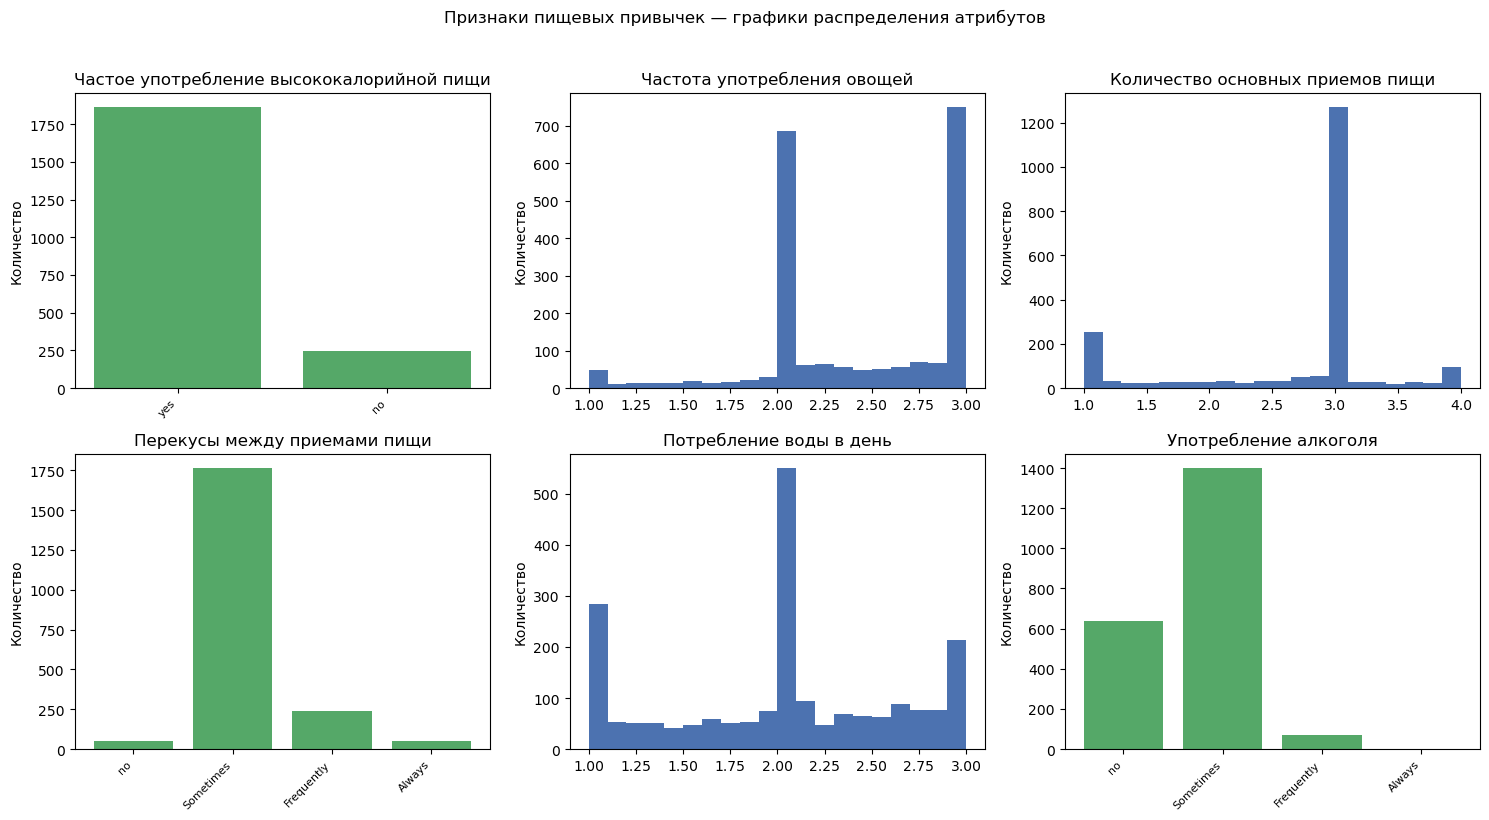

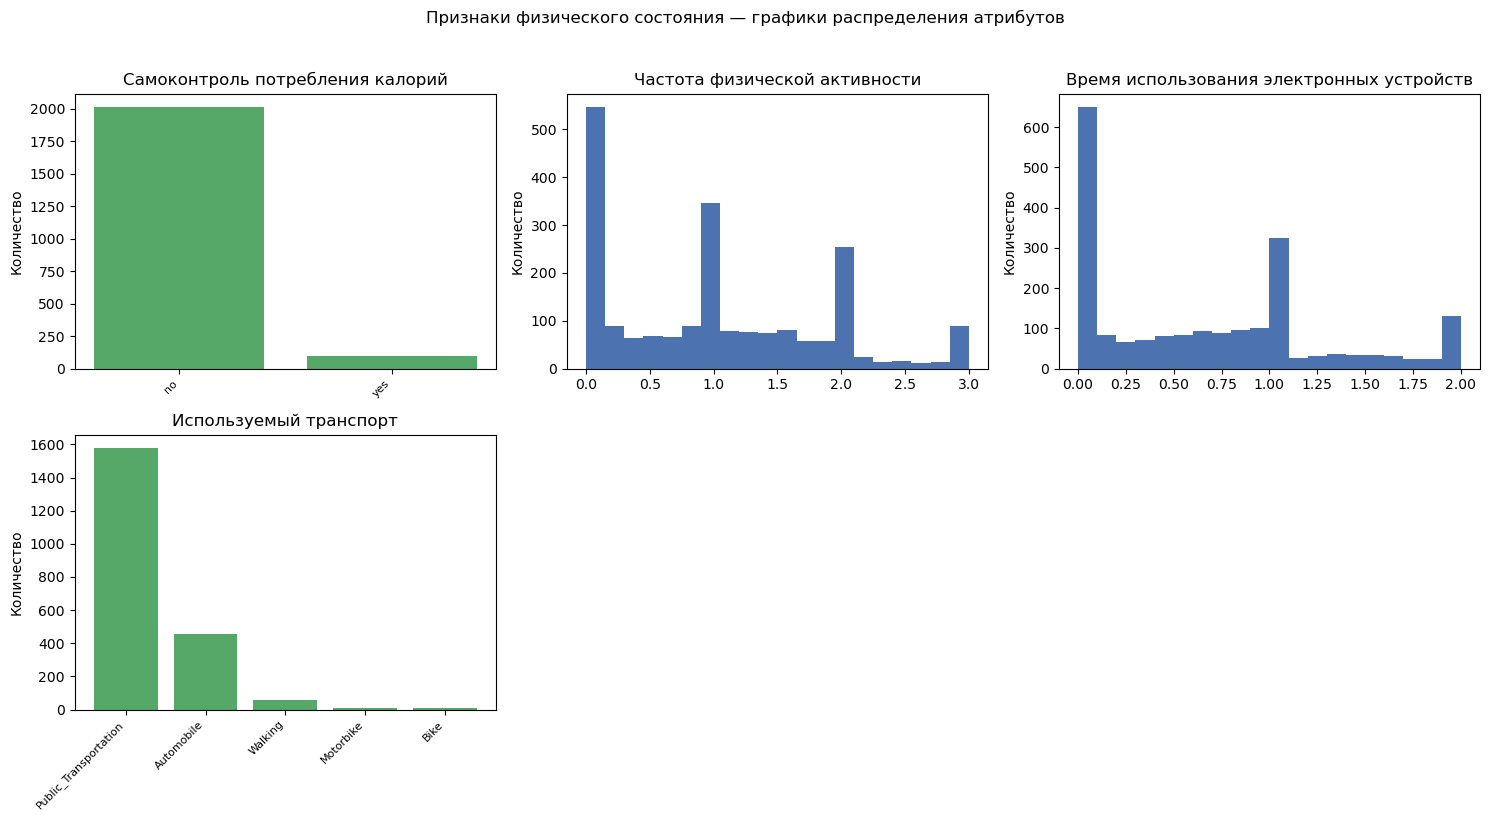

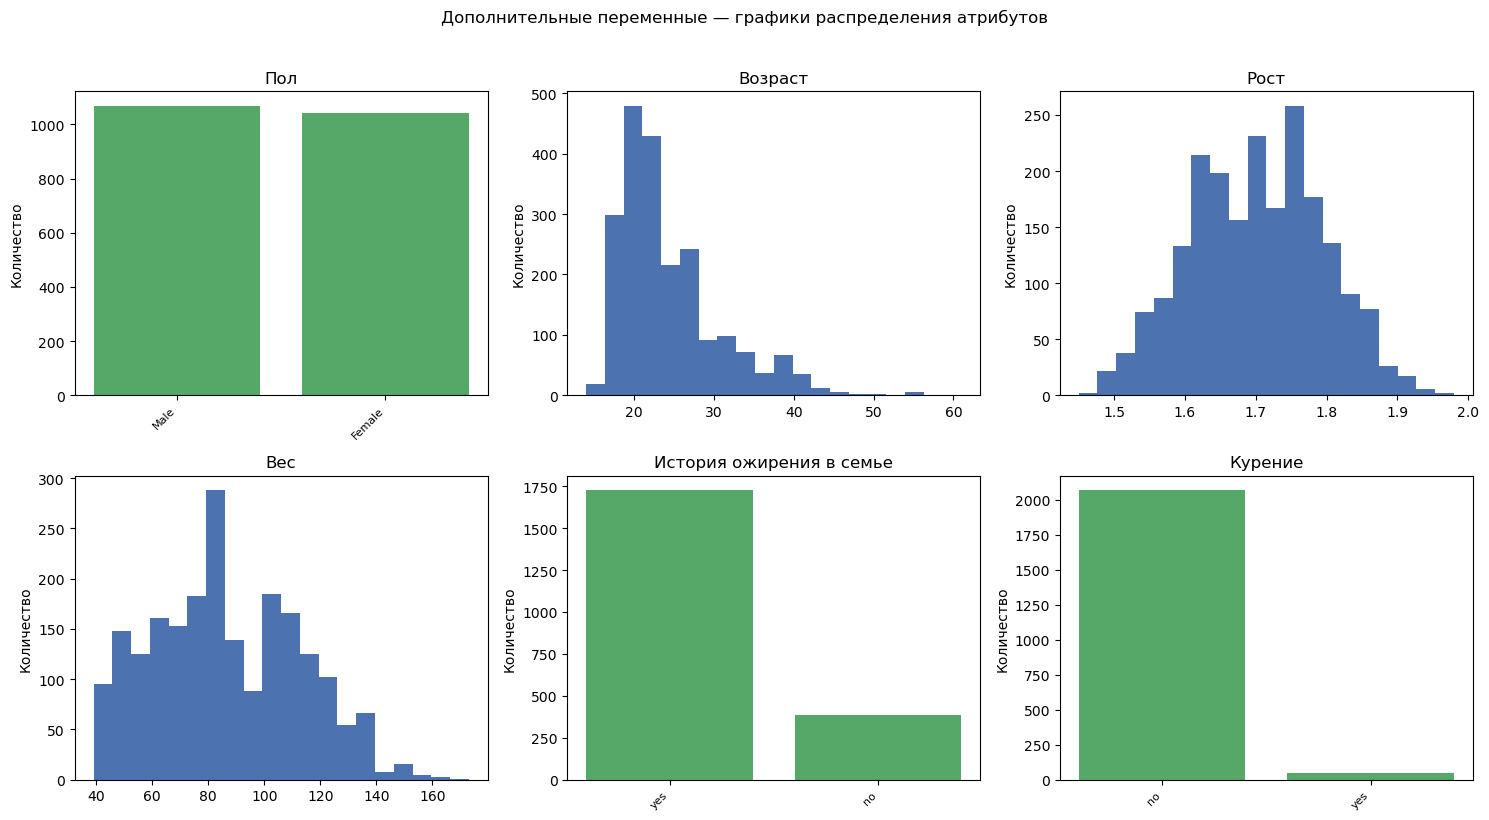

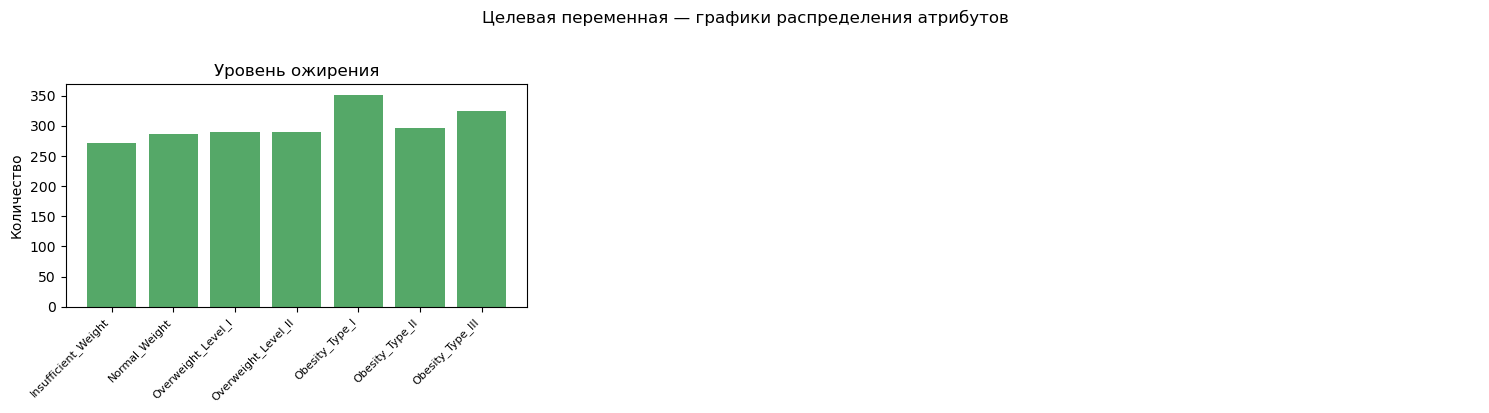

In [ ]:
# Барчарты для категориальных признаков и гистограмм для числовых

long_names = {
    column: meta.get("description_ru", column)
    for column, meta in columns_mapping.items()
}
df_named = load_raw_df("short_names")

numeric_df = df.apply(pd.to_numeric, errors="coerce")
numeric = [col for col in df.columns if numeric_df[col].notna().any()]

# Группировка признаков по типам
grouping = {}
for column in df.columns:
    group = columns_mapping.get(column, {}).get("group_ru", "Прочие признаки")
    grouping.setdefault(group, []).append(column)

ordered_groups = [
    "Признаки пищевых привычек",
    "Признаки физического состояния",
    "Дополнительные переменные",
    "Целевая переменная",
]
ordered_groups += [g for g in grouping.keys() if g not in ordered_groups]

display(Markdown("## Графики распределения атрибутов"))

for group in ordered_groups:
    columns = grouping.get(group, [])
    if not columns:
        continue

    n_cols = 3
    n_rows = math.ceil(len(columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for ax, column in zip(axes, columns):
        series = df[column]
        meta = columns_mapping.get(column, {})
        title = long_names.get(column, column)
        ordering = meta.get("order")

        if column in numeric:
            numeric_values = numeric_df[column].dropna()
            ax.hist(numeric_values, bins=20, color="#4C72B0")
        else:
            counts = series.value_counts(dropna=False)
            if ordering:
                categorical_series = pd.Categorical(series, categories=ordering, ordered=True)
                ordered_counts = pd.Series(categorical_series).value_counts(sort=False)
                extra = series[~series.isin(ordering)]
                if not extra.empty:
                    extra_counts = extra.value_counts()
                    ordered_counts = pd.concat([ordered_counts, extra_counts])
            else:
                ordered_counts = counts.sort_values(ascending=False)
            order_labels = ordered_counts.index.astype(str).tolist()
            order_values = ordered_counts.values.tolist()
            positions = list(range(len(order_labels)))
            ax.bar(positions, order_values, color="#55A868")
            ax.set_xticks(positions)
            ax.set_xticklabels(order_labels, rotation=45, ha="right", fontsize=8)
        ax.set_ylabel("Количество")
        ax.set_xlabel("")
        ax.set_title(title)

    for ax in axes[len(columns):]:
        ax.axis("off")

    fig.suptitle(f"{group} — графики распределения атрибутов", y=1.02)
    plt.tight_layout()
    plt.show()

